In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import pandas as pd


In [66]:
abbrev = "SanityChecks/NoScatteringNuc" 

ringNumber = 30
totalSize = 0.15


In [67]:
ringwidth = totalSize/ringNumber


coldGasMetLog = pd.read_table('../Output/' + abbrev + '/Enrichment_Log_ColdGas.dat',index_col=False , delimiter = ',\s', engine = 'python')


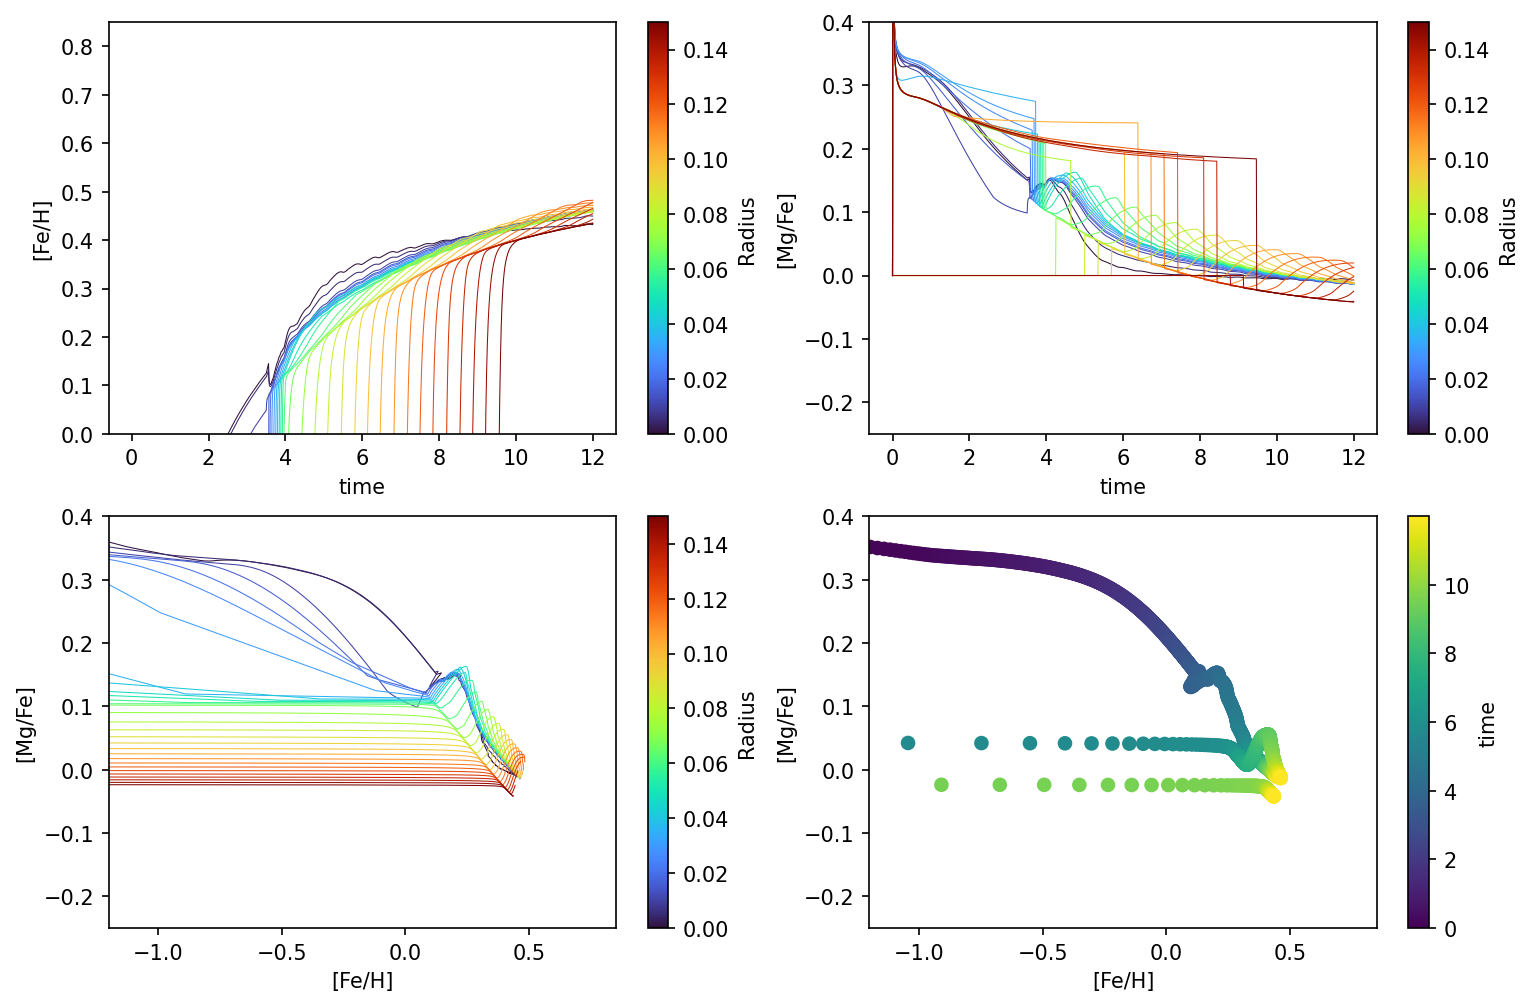

In [69]:

fig =figure(figsize=(12, 8), dpi=150)


gasRings = []
for i in range(ringNumber):
    a = coldGasMetLog[coldGasMetLog['RingIndex'] == i]
    gasRings.append(a)

cmap = plt.cm.get_cmap('turbo')
colors = cmap(np.linspace(0,1,ringNumber))
ax1 = fig.add_subplot(221)

for i in range(ringNumber):
    ring = gasRings[i]
    x = ring['Time']
    y = ring['Total_Fe']
    ax1.plot(x,y, color=colors[i], label = i,linewidth = 0.5) 

sm  = plt.cm.ScalarMappable(cmap = cmap)
sm.set_clim(0,totalSize)
clb = plt.colorbar(sm, ax = ax1)
clb.set_label('Radius')


plt.ylim(0,0.85)
plt.xlabel('time')
plt.ylabel('[Fe/H]')



cmap = plt.cm.get_cmap('turbo')
colors = cmap(np.linspace(0,1,ringNumber))
ax2 = fig.add_subplot(222)

for i in range(ringNumber):
    ring = gasRings[i]
    x = ring['Time']
    y = ring['Total_Mg'] -ring['Total_Fe']
    plt.plot(x,y, color=colors[i], label = i,linewidth = 0.5) 

sm  = plt.cm.ScalarMappable(cmap = cmap)
sm.set_clim(0,totalSize)
clb = plt.colorbar(sm, ax = ax2)
clb.set_label('Radius')

    
plt.ylim(-0.25,0.4)
plt.ylabel('[Mg/Fe]')
plt.xlabel('time')


cmap = plt.cm.get_cmap('turbo')
colors = cmap(np.linspace(0,1,ringNumber))
ax3 = fig.add_subplot(223)

for i in range(ringNumber):
    ring = gasRings[i]
    x = ring['Total_Fe']
    y = ring['Total_Mg'] -ring['Total_Fe']
    plt.plot(x,y, color=colors[i], label = i,linewidth = 0.5) 

sm  = plt.cm.ScalarMappable(cmap = cmap)
sm.set_clim(0,totalSize)
clb = plt.colorbar(sm, ax = ax3)
clb.set_label('Radius')

plt.xlim(-1.2,0.85)         
plt.ylim(-0.25,0.4)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')



ax4 = fig.add_subplot(224)

single_rings_to_plot = [1,18,29]

for ring_index in single_rings_to_plot:
    ring = gasRings[ring_index]
    x =ring['Total_Fe']
    y = ring['Total_Mg'] - ring['Total_Fe']
    c = ring['Time']
    plt.scatter(x,y,c=c,)#, label = 'Ring No{}'.format(ring_index))
    plt.xlim(-1.2,0.85)         
    plt.ylim(-0.25,0.4)

plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.legend()
clb = plt.colorbar()
clb.set_label('time')